In [ ]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Optional: Plot settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (15, 4)


In [ ]:
# 2. Load Dataset
file_path = "PJME_hourly.csv"  # Make sure this file is in your Colab/working directory
df = pd.read_csv(file_path, parse_dates=['Datetime'], index_col='Datetime')

# Preview
print(f"Initial shape: {df.shape}")
df.head()


Initial shape: (145366, 1)


,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [ ]:
# 3. Sort and Handle Duplicate Timestamps
df = df.sort_index()

# Check for duplicate timestamps
duplicates = df.index.duplicated().sum()
print(f"Duplicate timestamps: {duplicates}")

# Drop duplicates (keep first)
df = df[~df.index.duplicated(keep='first')]


Duplicate timestamps: 4


In [ ]:
# 4. Ensure Hourly Frequency + Fill Missing Values
df = df.asfreq('H')  # Align to hourly freq
df = df.fillna(method='ffill')  # Forward fill missing load values


/tmp/ipython-input-5-1875674983.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.asfreq('H')  # Align to hourly freq
/tmp/ipython-input-5-1875674983.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill missing load values


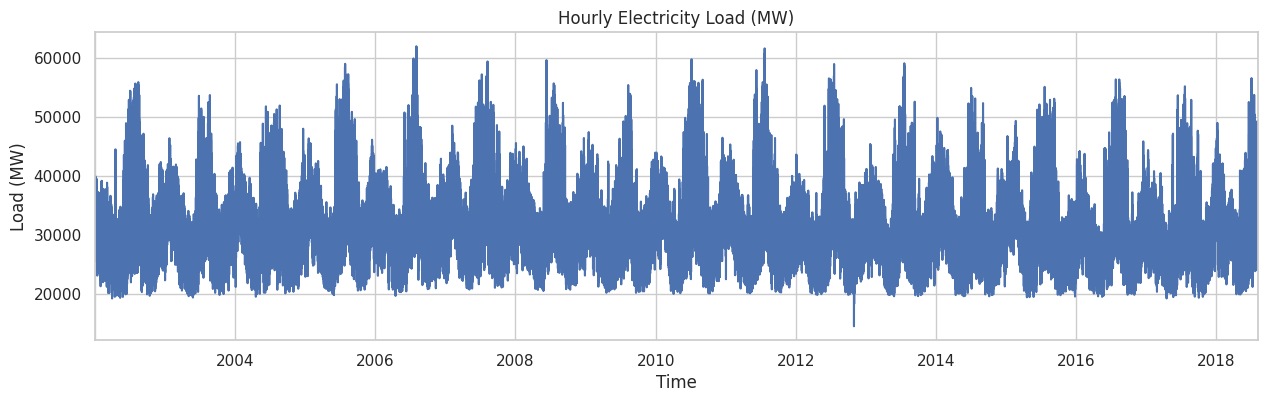

In [ ]:
# 5. Plot Entire Time Series
df['PJME_MW'].plot(title="Hourly Electricity Load (MW)")
plt.ylabel("Load (MW)")
plt.xlabel("Time")
plt.show()


In [ ]:
# 6. Add Time-Based Features
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year
df['day'] = df.index.day
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)


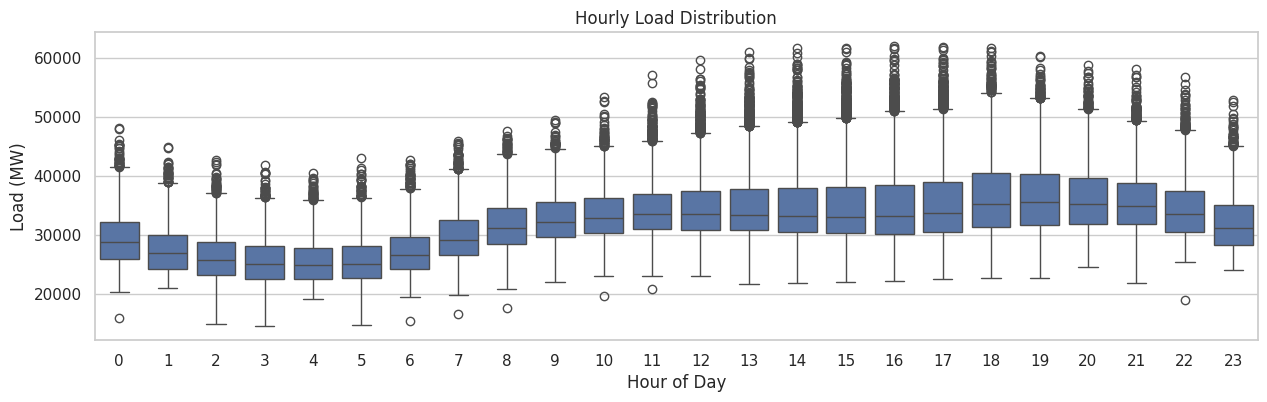

In [ ]:
# 7. Boxplot: Hourly Pattern
sns.boxplot(x='hour', y='PJME_MW', data=df.sample(100000))
plt.title("Hourly Load Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Load (MW)")
plt.show()


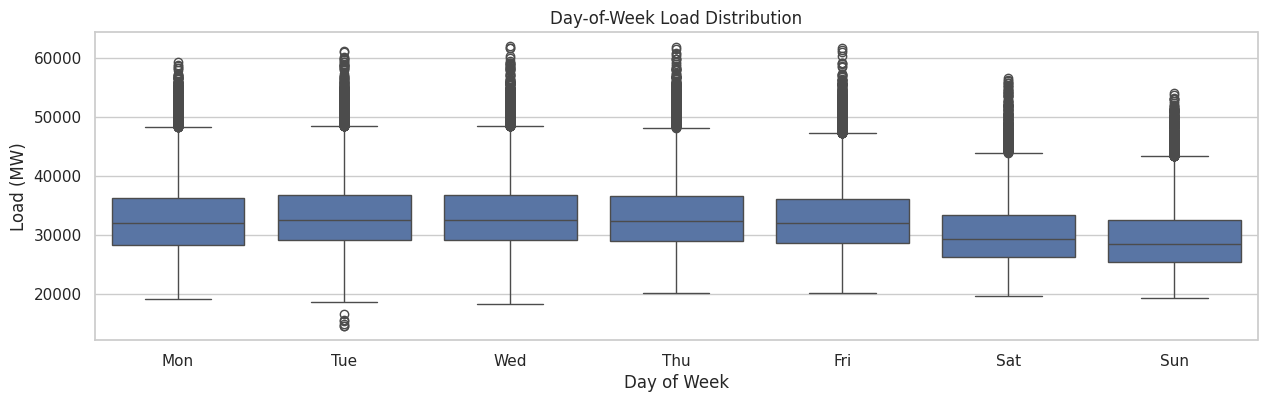

In [ ]:
# 8. Boxplot: Weekday Pattern
sns.boxplot(x='dayofweek', y='PJME_MW', data=df.sample(100000))
plt.title("Day-of-Week Load Distribution")
plt.xlabel("Day of Week")
plt.ylabel("Load (MW)")
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


/tmp/ipython-input-10-3359657745.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['PJME_MW'].resample('M').mean()


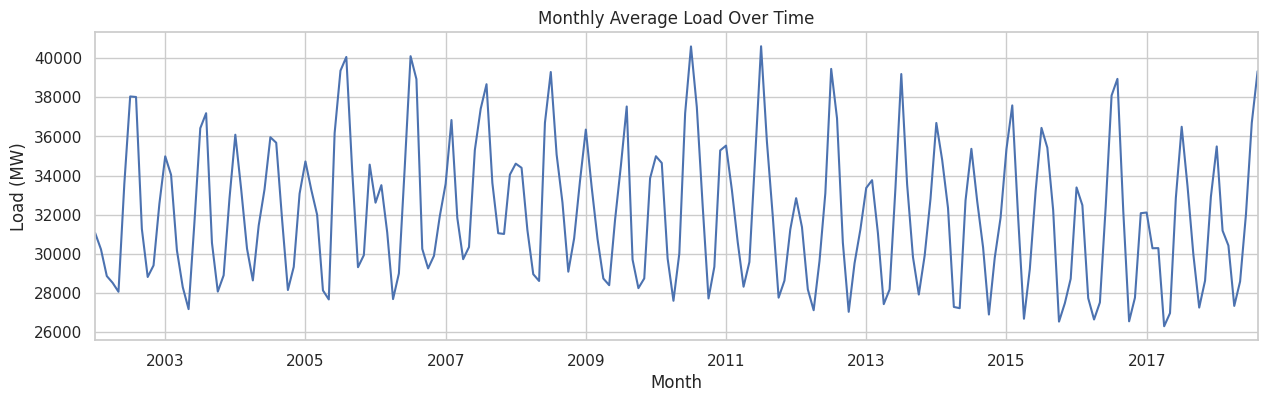

In [ ]:
# 9. Monthly Trend Over Time
monthly_avg = df['PJME_MW'].resample('M').mean()
monthly_avg.plot(title="Monthly Average Load Over Time")
plt.ylabel("Load (MW)")
plt.xlabel("Month")
plt.show()


In [ ]:
# 10. Save Cleaned Dataset for Next Step
df.to_csv("cleaned_PJME_hourly.csv")
print("Cleaned dataset saved as 'cleaned_PJME_hourly.csv'")


Cleaned dataset saved as 'cleaned_PJME_hourly.csv'
